In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
# county_df = pd.read_pickle("../Data/county_data_reduced.pkl")
county_df = pd.read_pickle("../Data/county_data_all.pkl")
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3092 entries, ('Autauga County', 'Alabama') to ('Weston County', 'Wyoming')
Data columns (total 75 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            3092 non-null   float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      3092 non-null   float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   3092 non-null   float64
 3   Population, Census, April 1, 2010                                                       3092 non-null   float64
 4   Persons under 5 years, percent                                                          3091 non-null   float64
 5   Persons under 18 

In [3]:
cases_df = county_df[['Cases', 'Cases per 100k']]

In [4]:
print(cases_df[cases_df.isnull().any(axis=1)].mean())
print(cases_df[cases_df.notna().any(axis=1)].mean())

Cases                    NaN
Cases per 100k    160.147478
dtype: float64
Cases             574.931239
Cases per 100k    481.678771
dtype: float64


In [19]:
receipts_df = county_df[['Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)']]
receipts_df.describe()

,"Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)"
count,2.621000e+03
mean,7.140421e+05
std,2.492285e+06
min,0.000000e+00
25%,3.359800e+04
50%,1.002670e+05
75%,3.841940e+05
max,6.726127e+07


In [6]:
county_df.columns

Index(['Population estimates, July 1, 2019,  (V2019)',
       'Population estimates base, April 1, 2010,  (V2019)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)',
       'Population, Census, April 1, 2010', 'Persons under 5 years, percent',
       'Persons under 18 years, percent', 'Persons 65 years and over, percent',
       'Female persons, percent', 'White alone, percent',
       'Black or African American alone, percent(a)',
       'American Indian and Alaska Native alone, percent(a)',
       'Asian alone, percent(a)',
       'Native Hawaiian and Other Pacific Islander alone, percent(a)',
       'Two or More Races, percent', 'Hispanic or Latino, percent(b)',
       'White alone, not Hispanic or Latino, percent', 'Veterans, 2015-2019',
       'Foreign born persons, percent, 2015-2019',
       'Housing units,  July 1, 2019,  (V2019)',
       'Owner-occupied housing unit rate, 2015-2019',
       'Median value of owner-occupied housing u

In [8]:
illinois_df = county_df.loc[pd.IndexSlice[:, 'Illinois'], :]
# illinois_df = county_df.loc[pd.IndexSlice[:, 'Texas'], :]

In [27]:
# first_features_test_df = county_df.copy().drop(['Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)', 'Cases'], axis=1).dropna()
# first_features_test_df = county_df.copy().drop(['Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)', 'Cases', 'Percent Beds Used (Covid)'\
#                                                 , 'Percent ICU Beds Used (Covid)', 'Deaths'\
#                                                 , 'Native Hawaiian and Other Pacific Islander alone, percent(a)', 'Building permits, 2019', 'New Hospital Admissions per 100 beds'\
#                                                 , 'Minority-owned firms, 2012', 'Veteran-owned firms, 2012', 'Total accommodation and food services sales, 2012 ($1,000)(c)'\
#                                                 , 'Total manufacturers shipments, 2012 ($1,000)(c)', 'Total merchant wholesaler sales, 2012 ($1,000)(c)'], axis=1).dropna()

first_features_test_df = illinois_df.copy().drop(['Total health care and social assistance receipts/revenue, 2012 ($1,000)(c)', 'Cases', 'Percent Beds Used (Covid)'\
                                                , 'Percent ICU Beds Used (Covid)', 'Deaths'\
                                                , 'Native Hawaiian and Other Pacific Islander alone, percent(a)', 'Building permits, 2019', 'New Hospital Admissions per 100 beds'\
                                                , 'Minority-owned firms, 2012', 'Veteran-owned firms, 2012', 'Total accommodation and food services sales, 2012 ($1,000)(c)'\
                                                , 'Total manufacturers shipments, 2012 ($1,000)(c)', 'Total merchant wholesaler sales, 2012 ($1,000)(c)'], axis=1).dropna()



# first_features_test_df = county_df.copy().dropna()
first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, ('Adams County', 'Illinois') to ('Woodford County', 'Illinois')
Data columns (total 62 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            100 non-null    float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      100 non-null    float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   100 non-null    float64
 3   Population, Census, April 1, 2010                                                       100 non-null    float64
 4   Persons under 5 years, percent                                                          100 non-null    float64
 5   Persons under 18

In [28]:
first_features_test_df.drop(first_features_test_df.columns[[7, 20, 21, 28, 34, 53, 54, 55, 57, 58, 59, 60, 61]], axis=1, inplace=True)
first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, ('Adams County', 'Illinois') to ('Woodford County', 'Illinois')
Data columns (total 49 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2019,  (V2019)                                            100 non-null    float64
 1   Population estimates base, April 1, 2010,  (V2019)                                      100 non-null    float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2019,  (V2019)   100 non-null    float64
 3   Population, Census, April 1, 2010                                                       100 non-null    float64
 4   Persons under 5 years, percent                                                          100 non-null    float64
 5   Persons under 18

In [29]:
corr_mat = first_features_test_df.corr()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(corr_mat)

                                                    Population estimates, July 1, 2019,  (V2019)  \
Population estimates, July 1, 2019,  (V2019)                                            1.000000   
Population estimates base, April 1, 2010,  (V2019)                                      0.999968   
Population, percent change - April 1, 2010 (est...                                      0.202037   
Population, Census, April 1, 2010                                                       0.999968   
Persons under 5 years, percent                                                          0.121477   
Persons under 18 years, percent                                                         0.100203   
Persons 65 years and over, percent                                                     -0.287576   
White alone, percent                                                                   -0.420471   
Black or African American alone, percent(a)                                             0.326848   


In [31]:
# corr_mat.iloc[:,-1:]
highly_correlated_features = []
high_corr_vals = []

# type(corr_mat['Cases per 100k'])
# corr_mat['Cases per 100k']

for index,value in corr_mat['Cases per 100k'].iteritems():
#     print(index, value)
    if(abs(value) >= 0.2):
#     if(abs(value) >= 0.1):
        highly_correlated_features.append(index)
        high_corr_vals.append(value)
        
# highly_correlated_features
for i, name in enumerate(highly_correlated_features):
    print(name, high_corr_vals[i])
    

# for index,row in corr_mat.iloc[:,-1:].iterrows():
#     print(index, row)

# for i in range(len(correlation_matrix .columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)

Persons under 18 years, percent -0.22736905655226444
Asian alone, percent(a) -0.2573156251895642
Two or More Races, percent -0.3098867170542666
Hispanic or Latino, percent(b) -0.20985169413258453
Foreign born persons, percent, 2015-2019 -0.23531650670899038
Owner-occupied housing unit rate, 2015-2019 0.21849174341996672
Median value of owner-occupied housing units, 2015-2019 -0.26448507240803093
Median gross rent, 2015-2019 -0.29565698750660524
Language other than English spoken at home, percent of persons age 5 years+, 2015-2019 -0.2522343932683001
Households with a computer, percent, 2015-2019 -0.2149432875617612
High school graduate or higher, percent of persons age 25 years+, 2015-2019 -0.4483081916552867
Bachelor's degree or higher, percent of persons age 25 years+, 2015-2019 -0.3506550689719514
With a disability, under age 65 years, percent, 2015-2019 0.2606304605437501
In civilian labor force, total, percent of population age 16 years+, 2015-2019 -0.44255390391343413
Per capita 

In [32]:
first_features_test_df = first_features_test_df[first_features_test_df.columns.intersection(highly_correlated_features)]
first_features_test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, ('Adams County', 'Illinois') to ('Woodford County', 'Illinois')
Data columns (total 16 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Persons under 18 years, percent                                                         100 non-null    float64
 1   Asian alone, percent(a)                                                                 100 non-null    float64
 2   Two or More Races, percent                                                              100 non-null    float64
 3   Hispanic or Latino, percent(b)                                                          100 non-null    float64
 4   Foreign born persons, percent, 2015-2019                                                100 non-null    float64
 5   Owner-occupied h

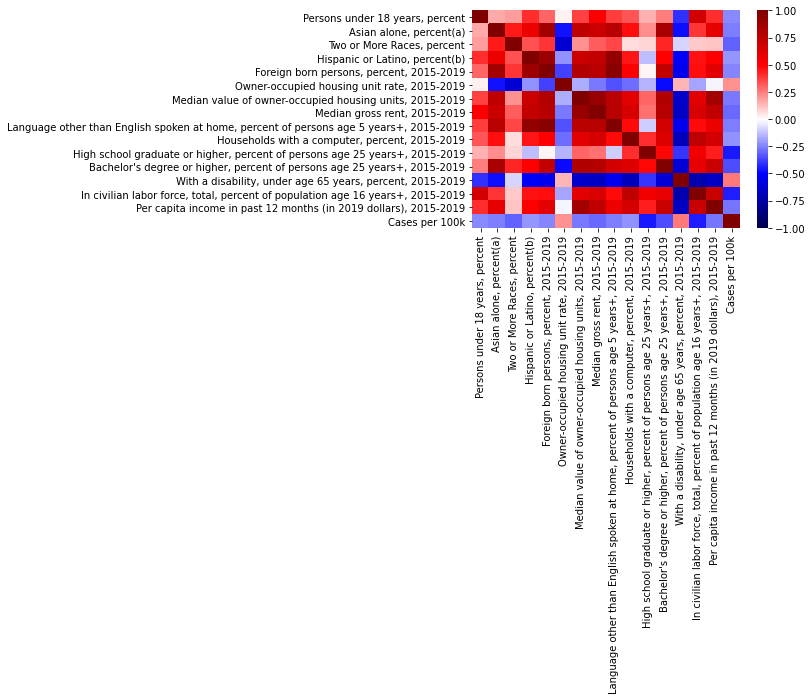

In [33]:
sns.heatmap(first_features_test_df.corr(), cmap="seismic", vmin=-1, vmax=1);


In [ ]:
test_exp_df = first_features_test_df[['Asian alone, percent(a)', 'Cases per 100k']].copy()
# test_exp_df['exptest'] = np.exp(test_exp_df['Asian alone, percent(a)'])
test_exp_df['exptest'] = np.exp(-1*(test_exp_df['Asian alone, percent(a)']))
sns.pairplot(test_exp_df)

[3280.95798704 1205.13201689  574.83244365  383.4495639   325.33845576
  307.69371714  302.33610462  300.70933005  300.21537953  300.0653974
  300.01985713  300.00602938  300.00183075  300.00055588  300.00016879
  300.00005125  300.00001556  300.00000473  300.00000143  300.00000044
  300.00000013  300.00000004  300.00000001  300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.          300.          300.          300.
  300.          300.    

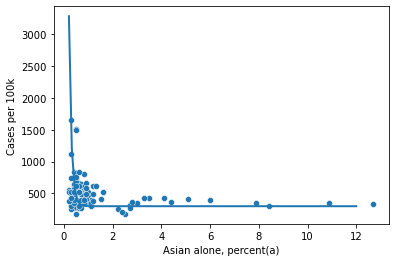

In [132]:
    test_x = np.linspace(0.2, 12, 100)
    test_y = np.exp(-10*(test_x-1))+300
    
    print(test_y)

#     plt.figure()
#     plt.plot(x, y)
#     plt.xlabel('$x$')
#     plt.ylabel('$\exp(x)$')

#     plt.figure()
#     plt.plot(x, -np.exp(-x))
#     plt.xlabel('$x$')
#     plt.ylabel('$-\exp(-x)$')


sns.scatterplot(data=first_features_test_df, x='Asian alone, percent(a)', y='Cases per 100k')
plt.plot(test_x, test_y, linewidth=2)

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(first_features_test_df[['Cases per 100k']].sort_values(by='Cases per 100k', ascending=False))

                             Cases per 100k
COUNTY             STATE                   
Brown County       Illinois         1657.04
Hardin County      Illinois         1517.93
Montgomery County  Illinois         1499.26
Johnson County     Illinois         1111.38
White County       Illinois          834.75
Clark County       Illinois          828.96
Union County       Illinois          828.68
Perry County       Illinois          827.12
Cass County        Illinois          798.55
Washington County  Illinois          763.30
Jasper County      Illinois          738.81
De Witt County     Illinois          722.60
Lawrence County    Illinois          676.11
Richland County    Illinois          670.41
Cumberland County  Illinois          668.77
Effingham County   Illinois          652.79
Hamilton County    Illinois          640.71
Clinton County     Illinois          638.94
Jefferson County   Illinois          623.61
Marion County      Illinois          623.57
Fayette County     Illinois     

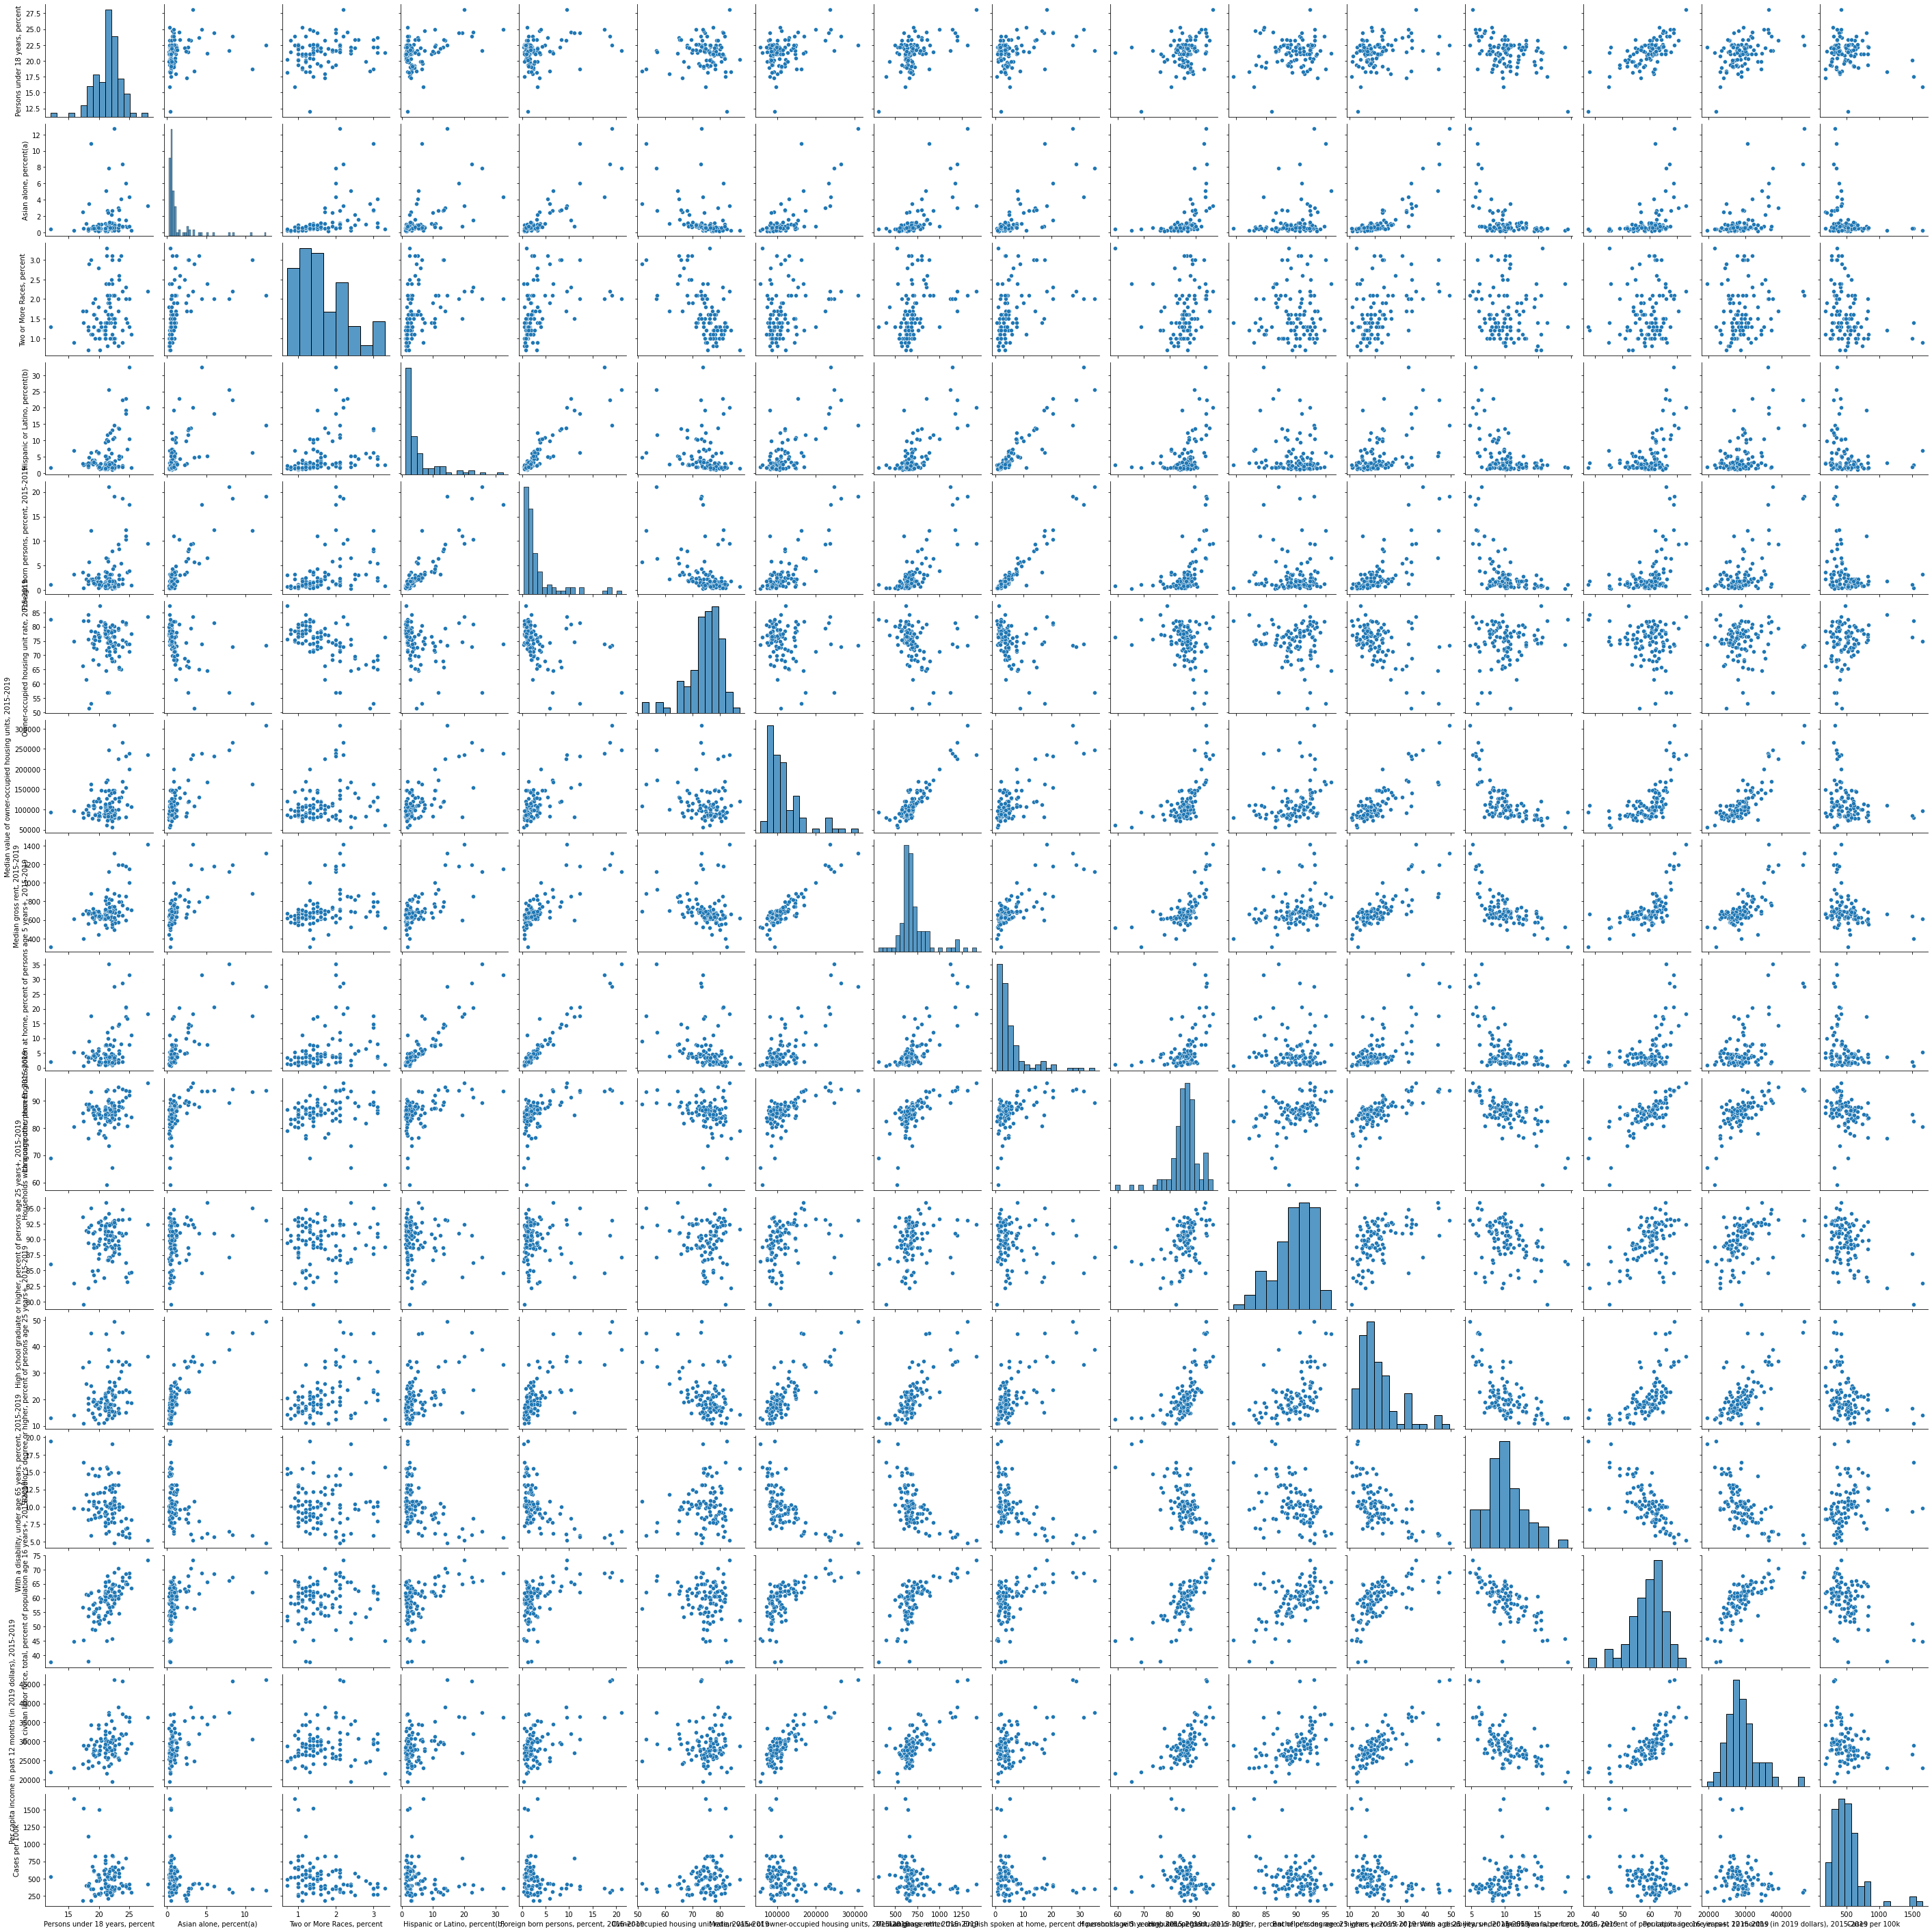

In [34]:
sns.pairplot(first_features_test_df)#, height=1.2, aspect=1.5);

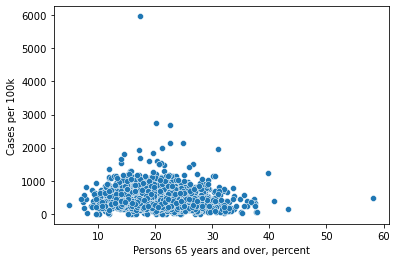

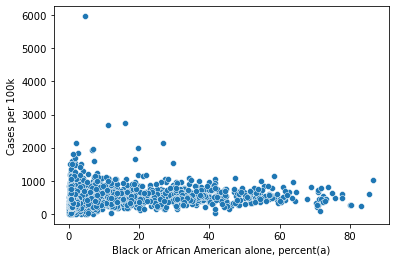

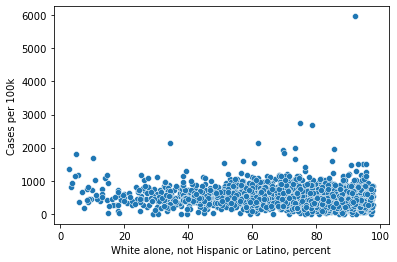

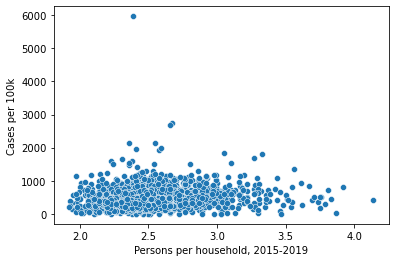

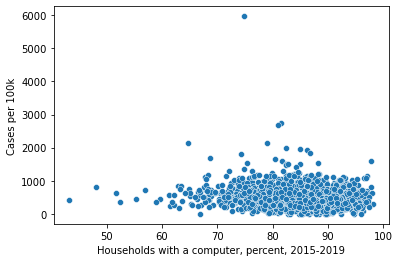

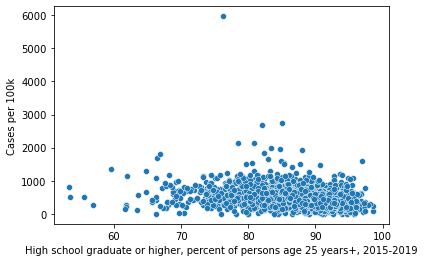

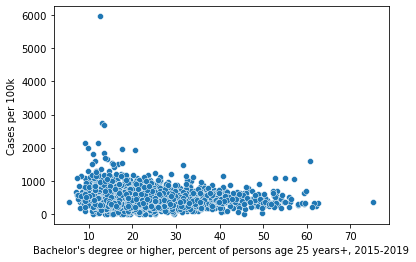

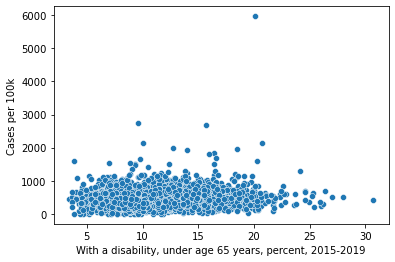

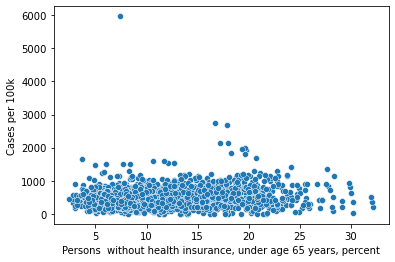

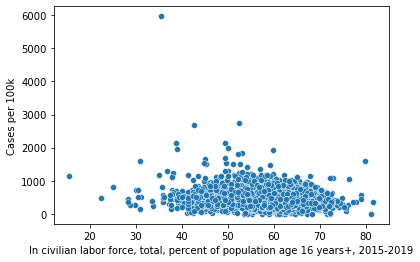

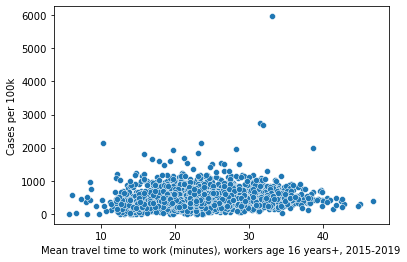

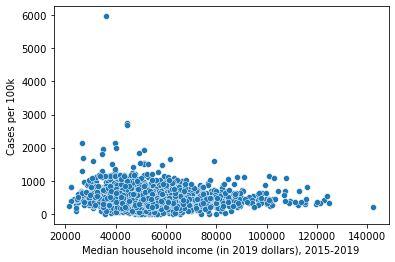

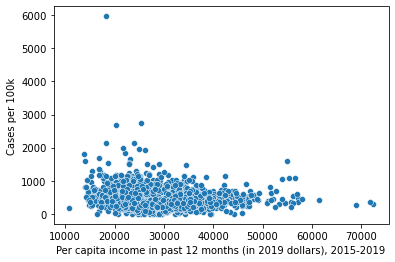

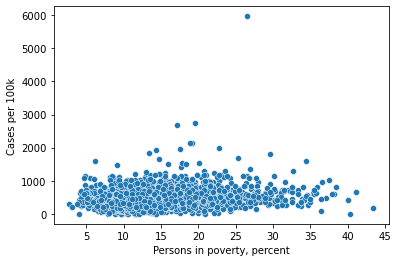

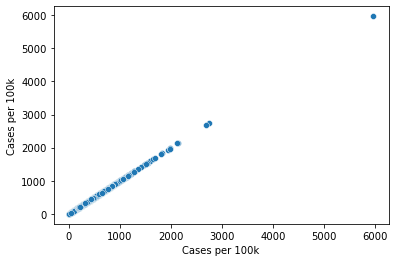

In [22]:
# plt.figure(figsize=(15,20))
# sns.pairplot(first_features_test_df, height=5.0, aspect=1);
# sns.pairplot(first_features_test_df)#, height=1.2, aspect=1.5);

# sns.pairplot(data=first_features_test_df, x_vars=first_features_test_df.columns, y_vars=['Cases per 100k'])
# sns.scatterplot(data=first_features_test_df, x='Persons under 18 years, percent', y='Cases per 100k')

for col in first_features_test_df.columns:
    sns.scatterplot(data=first_features_test_df, x=col, y='Cases per 100k')
    plt.show()




In [23]:
X, y = first_features_test_df.drop('Cases per 100k',axis=1), first_features_test_df['Cases per 100k']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=110) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state = 715)
cv_lm_r2s = [] #collect the validation results

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(round(lm.score(X_val, y_val), 3))

print('Simple regression scores: ', cv_lm_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Simple regression scores:  [0.103, 0.036, 0.054, 0.034, 0.082] 

Simple mean cv r^2: 0.062 +- 0.027


In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_poly_r2s = []

for train_ind, val_ind in kf.split(X,y):    

    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #poly with degree 2
    poly = PolynomialFeatures(degree=2)

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)

    lm_poly = LinearRegression()
    
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(round(lm_poly.score(X_val_poly, y_val), 3))
    
print('Poly scores: ', cv_lm_poly_r2s, '\n')

print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')

Poly scores:  [0.06, -0.046, 0.002, -0.107, 0.027] 

Poly mean cv r^2: -0.013 +- 0.058
